# 환경설정하기

### 1. GPU 사용 설정
메뉴 바에서 [런타임] -> [런타임 유형 변경] -> [하드웨어 가속기] 항목에서 GPU 선택

※ Colab GPU 하루 최대 12시간까지 사용 가능

### 2. 라이브러리 설치하기
1. 현재 환경에 설치된 라이브러리 목록을 확인한다
2. 없는건 설치
  * torch
  * transformers
  * datasets

In [ ]:
! pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.5
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
desc

In [1]:
! pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 778.3 kB/s eta 0:00:00


# 데이터셋 가져오기

CodeXGLUE Defect Detection dataset:
https://huggingface.co/datasets/code_x_glue_cc_defect_detection

In [ ]:
from datasets import load_dataset

dsd = load_dataset("code_x_glue_cc_defect_detection")
dsd

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/21854 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2732 [00:00<?, ? examples/s]

Dataset code_x_glue_cc_defect_detection downloaded and prepared to /root/.cache/huggingface/datasets/code_x_glue_cc_defect_detection/default/0.0.0/b0f3f36d6908feee44326eb5d257cfe4a02fe9fa50dfe441cad249b0e0ebfb11. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'func', 'target', 'project', 'commit_id'],
        num_rows: 21854
    })
    validation: Dataset({
        features: ['id', 'func', 'target', 'project', 'commit_id'],
        num_rows: 2732
    })
    test: Dataset({
        features: ['id', 'func', 'target', 'project', 'commit_id'],
        num_rows: 2732
    })
})

### DatasetDict 구성
* train split: 학습에 사용
* validation split: 학습 중 검증에 사용 (학습에 영향을 준다)
* test split: 학습 후 검증에 사용 (학습에 영향을 주지 않는다)

### Dataset 개별 예제 살펴보기

In [ ]:
dsd['train'][0]

{'id': 0,
 'func': 'static av_cold int vdadec_init(AVCodecContext *avctx)\n\n{\n\n    VDADecoderContext *ctx = avctx->priv_data;\n\n    struct vda_context *vda_ctx = &ctx->vda_ctx;\n\n    OSStatus status;\n\n    int ret;\n\n\n\n    ctx->h264_initialized = 0;\n\n\n\n    /* init pix_fmts of codec */\n\n    if (!ff_h264_vda_decoder.pix_fmts) {\n\n        if (kCFCoreFoundationVersionNumber < kCFCoreFoundationVersionNumber10_7)\n\n            ff_h264_vda_decoder.pix_fmts = vda_pixfmts_prior_10_7;\n\n        else\n\n            ff_h264_vda_decoder.pix_fmts = vda_pixfmts;\n\n    }\n\n\n\n    /* init vda */\n\n    memset(vda_ctx, 0, sizeof(struct vda_context));\n\n    vda_ctx->width = avctx->width;\n\n    vda_ctx->height = avctx->height;\n\n    vda_ctx->format = \'avc1\';\n\n    vda_ctx->use_sync_decoding = 1;\n\n    vda_ctx->use_ref_buffer = 1;\n\n    ctx->pix_fmt = avctx->get_format(avctx, avctx->codec->pix_fmts);\n\n    switch (ctx->pix_fmt) {\n\n    case AV_PIX_FMT_UYVY422:\n\n        vda_

### 각각의 split 별로 "target" 필드의 구성 비율 확인해보기

In [ ]:
for split in dsd:
  ds = dsd[split]
  fds = ds.filter(lambda ex: ex['target'])
  ratio = fds.num_rows / ds.num_rows
  print(f"{split}: total {ds.num_rows:,} target=True {fds.num_rows:,} ({ratio * 100:.2f}%)")

  0%|          | 0/22 [00:00<?, ?ba/s]

train: total 21,854 target=True 10,018 (45.84%)


  0%|          | 0/3 [00:00<?, ?ba/s]

validation: total 2,732 target=True 1,187 (43.45%)


  0%|          | 0/3 [00:00<?, ?ba/s]

test: total 2,732 target=True 1,255 (45.94%)


# CodeBERT 토크나이저 이용해서 데이터 분석하기
### 모델 허브에서 토크나이저 다운로드하기
* Hugging Face model hub: https://huggingface.co/microsoft/codebert-base

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/498 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

### 토크나이저 설정 확인
* 사전 크기 확인
* bos: begining of a sequence
* eos: end of a sequence

In [ ]:
tokenizer.vocab_size, tokenizer.bos_token, tokenizer.eos_token

(50265, '<s>', '</s>')

### 토크나이저 적용해보기
* API: https://huggingface.co/docs/transformers/main_classes/tokenizer

In [ ]:
example_text = """
#include <stdio.h>

int main()
{
    printf("Hello, world!\\n");
    return 0;
}
"""
tokens = tokenizer.tokenize(example_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
decoded_text = tokenizer.decode(token_ids)

assert example_text == decoded_text

for i, t in enumerate(tokens):
  tid = token_ids[i]
  print(f"{i:>2}: {tid:>5} {t}")

 0: 50118 Ċ
 1: 10431 #
 2: 47209 include
 3: 28696 Ġ<
 4: 47717 std
 5:  1020 io
 6:     4 .
 7:   298 h
 8: 15698 >
 9: 50118 Ċ
10: 50118 Ċ
11:  2544 int
12:  1049 Ġmain
13: 43048 ()
14: 50118 Ċ
15: 45152 {
16: 50118 Ċ
17:  1437 Ġ
18:  1437 Ġ
19:  1437 Ġ
20: 49558 Ġprintf
21: 46469 ("
22: 31414 Hello
23:     6 ,
24:   232 Ġworld
25:   328 !
26: 37457 \
27:   282 n
28: 45751 ");
29: 50118 Ċ
30:  1437 Ġ
31:  1437 Ġ
32:  1437 Ġ
33:   671 Ġreturn
34:   321 Ġ0
35:   131 ;
36: 50118 Ċ
37: 24303 }
38: 50118 Ċ


### 모델과 같은 토크나이저를 사용해야하는 이유

In [ ]:
tokenizer_other = AutoTokenizer.from_pretrained("salesforce/codet5-base")
tokens_other = tokenizer_other.tokenize(example_text)
token_ids_other = tokenizer_other.convert_tokens_to_ids(tokens_other)

lim = min(len(tokens), len(tokens_other))

for tid, t, tid_o, t_o in zip(token_ids[:lim], tokens[:lim], token_ids_other[:lim], tokens_other[:lim]):
  print(f"{tid:>5} {t:>10} ::: {tid_o:>5} {t_o}")

50118          Ċ :::   203 Ċ
10431          # :::     7 #
47209    include :::  6702 include
28696         Ġ< :::   411 Ġ<
47717        std :::  5084 std
 1020         io :::  1594 io
    4          . :::    18 .
  298          h :::    76 h
15698          > :::    34 >
50118          Ċ :::   203 Ċ
50118          Ċ :::   203 Ċ
 2544        int :::   474 int
 1049      Ġmain :::  2774 Ġmain
43048         () :::  1435 ()
50118          Ċ :::   203 Ċ
45152          { :::    95 {
50118          Ċ :::   203 Ċ
 1437          Ġ :::   565 ĠĠĠ
 1437          Ġ ::: 12710 Ġprintf
 1437          Ġ :::  2932 ("
49558    Ġprintf ::: 18601 Hello
46469         (" :::    16 ,
31414      Hello :::  9117 Ġworld
    6          , ::: 24440 !\
  232     Ġworld :::    82 n
  328          ! :::  8863 ");
37457          \ :::   203 Ċ
  282          n :::   565 ĠĠĠ
45751        "); :::   327 Ġreturn
50118          Ċ :::   374 Ġ0
 1437          Ġ :::    31 ;
 1437          Ġ :::   203 Ċ
 1437          Ġ :::    9

### 데이터셋의 토큰 길이 분석해보기

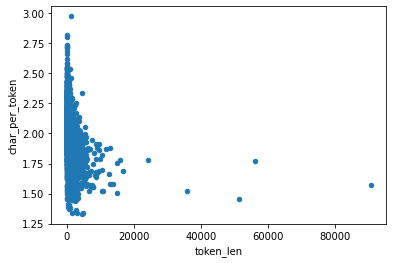

In [ ]:
import pandas as pd

ds_test = dsd['test']
token_lengths = [len(tokenizer.tokenize(code)) for code in ds_test['func']]
text_lengths = [len(code) for code in ds_test['func']]
df = pd.DataFrame(dict(token_len=token_lengths, text_len=text_lengths))
df['char_per_token'] = df['text_len'] / df['token_len']
df.plot.scatter(x='token_len', y='char_per_token')

# CodeBERT 가져오기

### 모델 허브에서 모델 다운로드하기
* Hugging Face model hub: https://huggingface.co/microsoft/codebert-base

In [ ]:
from transformers import RobertaConfig, RobertaModel

model = RobertaModel.from_pretrained("microsoft/codebert-base")
model.config

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

### 모델 구조 확인
* Roberta 모델 구조 사용
* 모델에 입력할수 있는 토큰 최대 길이: 514
* Embedding Layer + 12 x Encoder Layer + Pooler Layer
  * Embedding Layer: 50,265 -> 768
  * Encoder Layer: 768 -> 768
  * Pooler Layer: [N x 768] -> 768 ([참고](https://github.com/huggingface/transformers/blob/v4.25.1/src/transformers/models/roberta/modeling_roberta.py#L570-L582))

In [ ]:
print(repr(model.config))

RobertaConfig {
  "_name_or_path": "microsoft/codebert-base",
  "architectures": [
    "RobertaModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p

In [ ]:
print(repr(model))

### 모델 크기 계산해서 `pytorch_model.bin` 크기와 비교해보기

* 파라미터 개수 구하기
* 파라미터 크기 확인
  * `torch.float16` -> 개당 2 byte
  * `torch.float32` -> 개당 4 byte
* 파라미터 개수 x 파라미터 크기 = 모델의 최소 크기
  * (예시) GPT-3 최소 크기: 175 B x 4 byte = 700 GB

(참고) mixed precision 사용하는 경우도 있음

In [ ]:
type_params = set([t.dtype for t in model.parameters()])
type_params

{torch.float32}


In [ ]:
num_params = sum(t.numel() for t in model.parameters())
print(f"number of params : {num_params:,}")
print(f"total param size : {num_params * 4:,}")

number of params : 124,645,632
total param size : 498,582,528


### CodeBERT 를 이용한 코드 데이터 임베딩 생성

In [ ]:
example_text = """
#include <stdio.h>

int main()
{
    printf("Hello, world!\\n");
    return 0;
}
""".strip()

tokenized_inputs = tokenizer(example_text, max_length=model.config.max_position_embeddings,
                             padding='max_length', truncation=True, return_tensors='pt')
model_out = model(**tokenized_inputs, output_attentions=True)

model_out.last_hidden_state.shape, model_out.pooler_output.shape

(torch.Size([1, 514, 768]), torch.Size([1, 768]))

### CodeBERT 모델의 Attention 점수 확인해보기

* 각 층별 Attention shape: batch_size, num_heads, sequence_length, sequence_length
([참고](https://huggingface.co/docs/transformers/main_classes/output#transformers.modeling_outputs.BaseModelOutput.attentions))
* multi-head attention: attention 연산을 병렬화하는 기법
* Transformers 의 `ModelOutput` 출력에 달린 `attentions` 는 이미 multi-head attention 에 대한 softmax, weighted average 연산을 마친 값

In [ ]:
attns = model_out.attentions
attns[0].shape

torch.Size([1, 12, 514, 514])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_attention(attention, tokens):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  attention = attention[:len(tokens), :len(tokens)]

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + tokens, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + tokens, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')
  plt.suptitle('Attention weights')

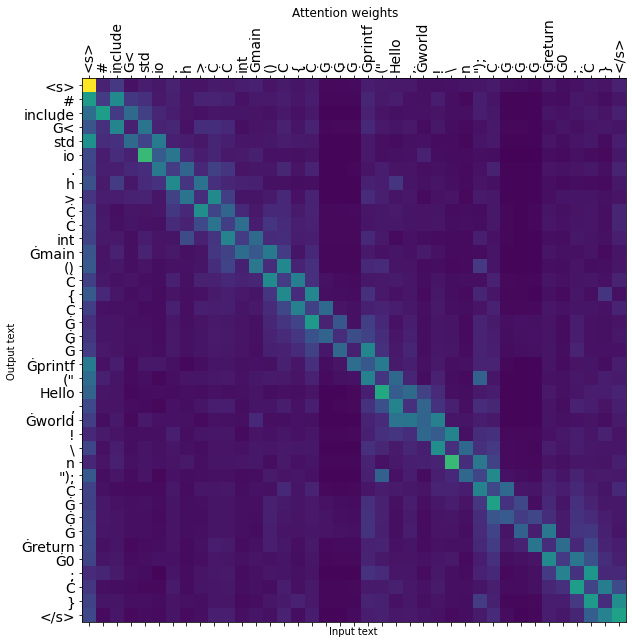

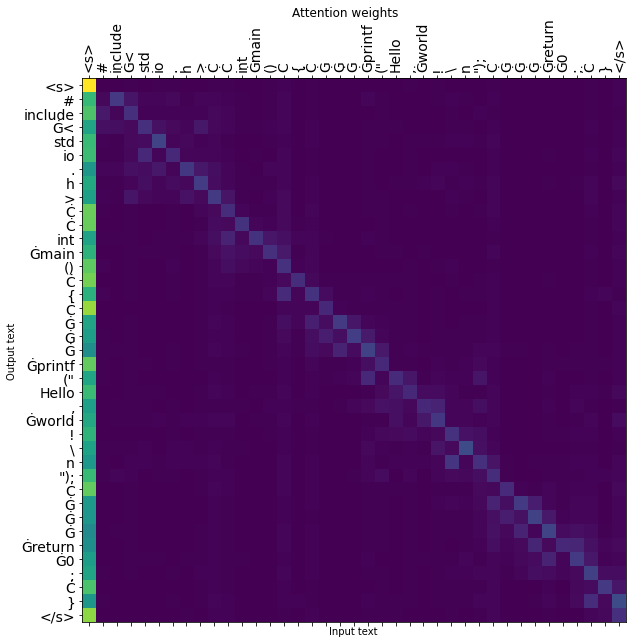

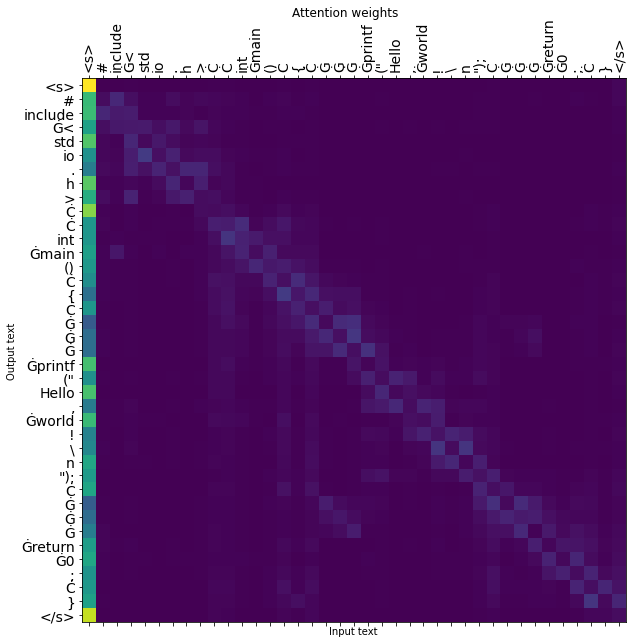

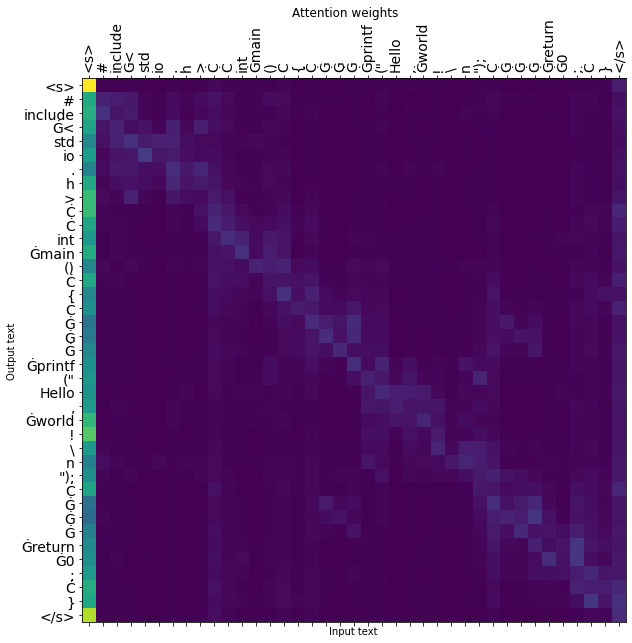

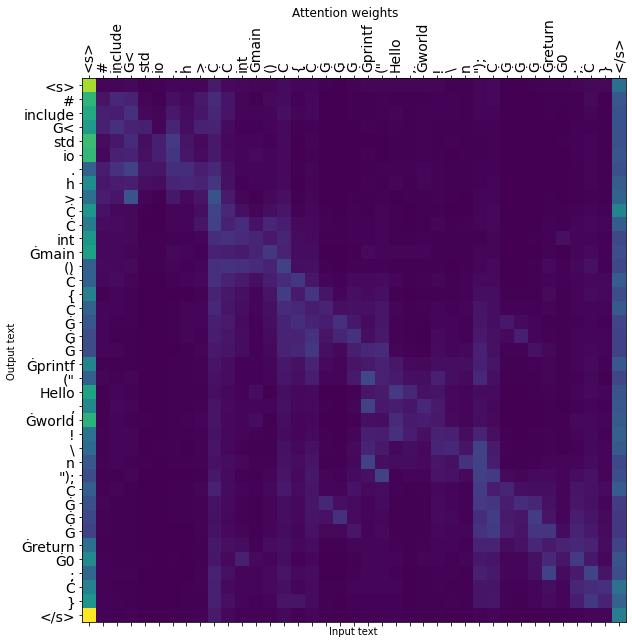

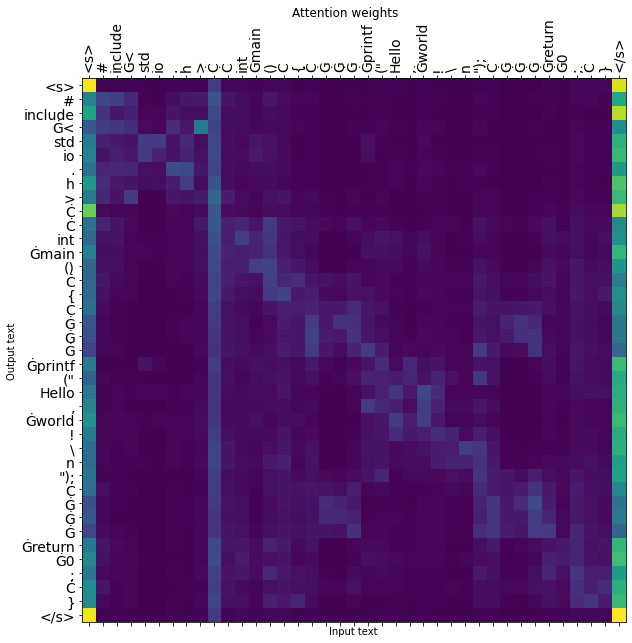

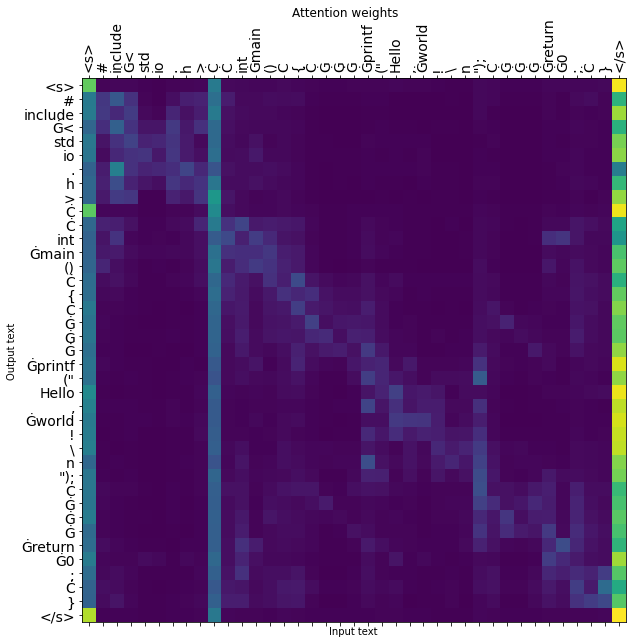

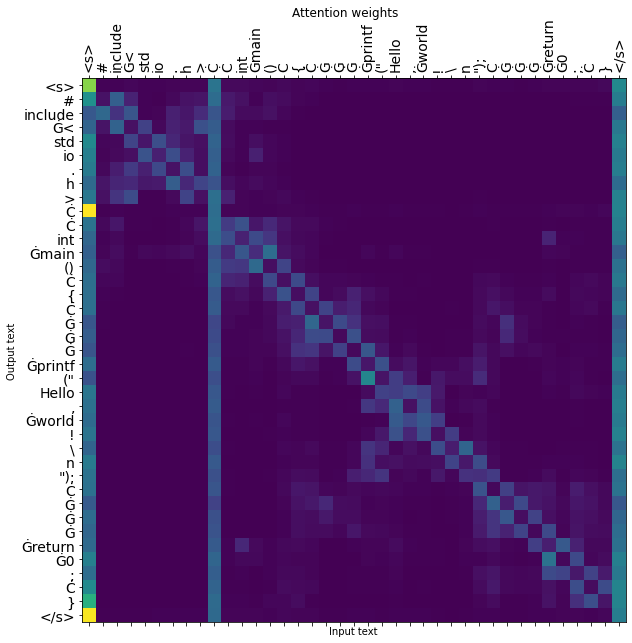

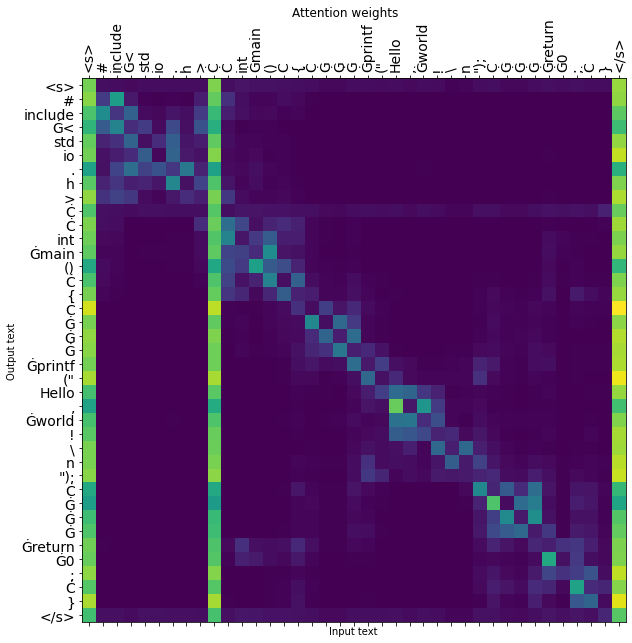

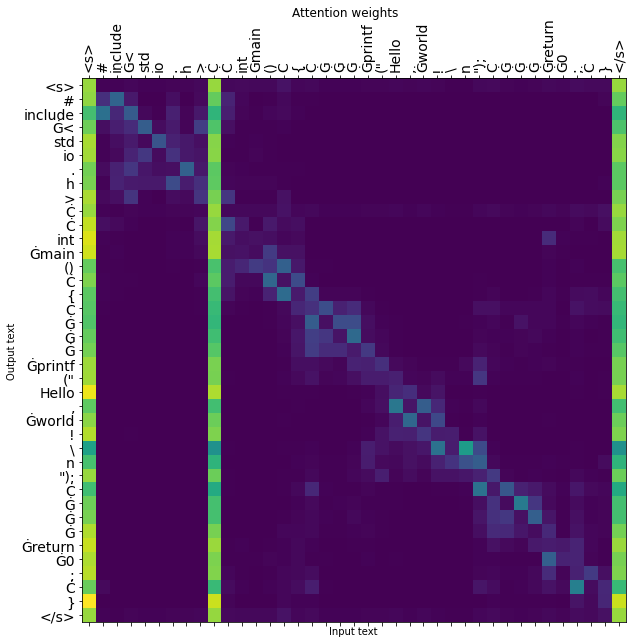

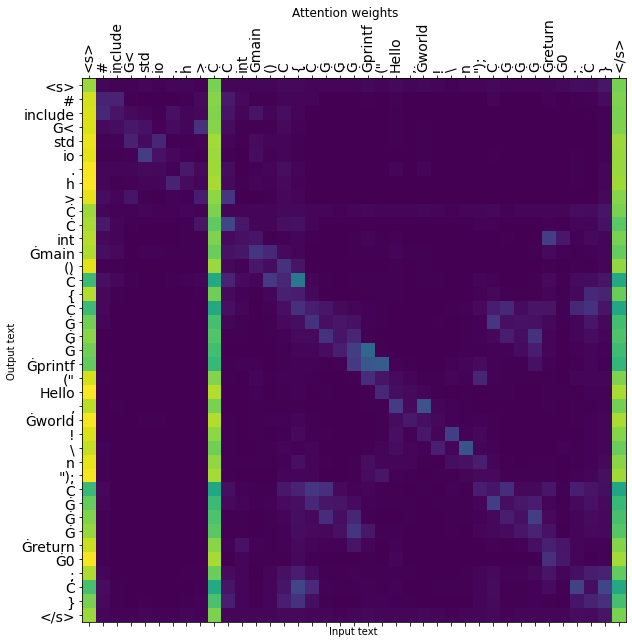

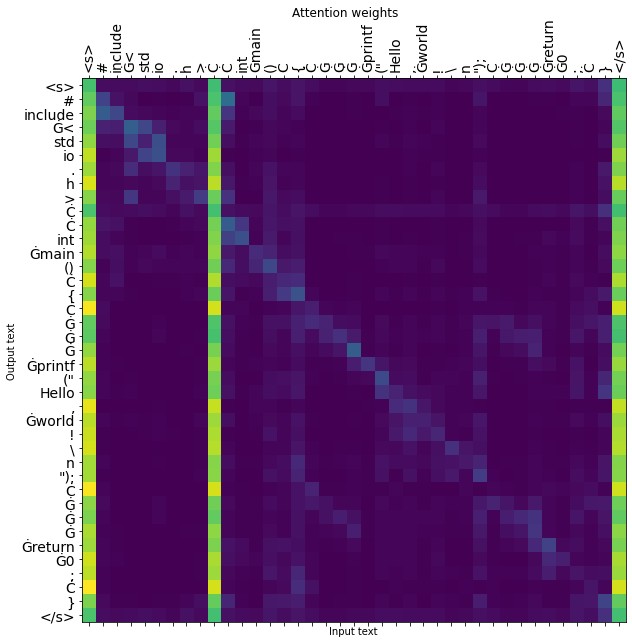

In [ ]:
for layer_idx in range(model.config.num_hidden_layers):
  sum_heads = attns[layer_idx][0, 0, :, :]
  for head_idx in range(1, model.config.num_attention_heads):
    sum_heads = sum_heads + attns[layer_idx][0, head_idx, :, :]
  plot_attention(sum_heads.detach().numpy(), tokenizer.tokenize(example_text, add_special_tokens=True))